# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [57]:
!pip install citipy

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [59]:
import api_keys

### Generate the Cities List by Using the `citipy` Library

In [60]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
##TO DO MY CODE HERE # Convert the cities weather data into a Pandas DataFrame 
city_data_df = pd.DataFrame(cities)

# Show Record Count
city_data_df.count()

0    597
dtype: int64

In [62]:
##TO DO MY CODE HERE # Set the API base URL
url = "http://api.openweathermap.org/"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

##TO DO MY CODE HERE    # Create endpoint URL with each city 
    city_url = f"{url}data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        
        #print(f"Status Code: {response.status_code}")
        city_weather = response.json()
        
       
##TO DO MY CODE HERE       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get('coord', {}).get('lat')
        city_lng = city_weather.get('coord', {}).get('lon')
        city_max_temp = city_weather.get('main', {}).get('temp_max')
        city_humidity = city_weather.get('main', {}).get('humidity')
        city_clouds = city_weather.get('clouds', {}).get('all')
        city_wind = city_weather.get('wind', {}).get('speed')
        city_country = city_weather.get('sys', {}).get('country')
        city_date = city_weather.get('dt')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | agadez
Processing Record 3 of Set 1 | taiohae
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | belmonte
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | kirakira
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | kyongsong
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | mahibadhoo
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | santo antonio
Processing Record 20 of Set 1 | awjilah
Processing Record 21 of Set 1 | arkhangel'sk
Processing Record 22 of Set 1 | flin flon
Process

Processing Record 44 of Set 8 | marsa alam
Processing Record 45 of Set 8 | savantvadi
Processing Record 46 of Set 8 | barnoldswick
Processing Record 47 of Set 8 | totness
Processing Record 48 of Set 8 | greymouth
Processing Record 49 of Set 8 | caucaia
Processing Record 0 of Set 9 | nimbahera
Processing Record 1 of Set 9 | myitkyina
Processing Record 2 of Set 9 | al khums
Processing Record 3 of Set 9 | touros
Processing Record 4 of Set 9 | klaksvik
Processing Record 5 of Set 9 | tarko-sale
Processing Record 6 of Set 9 | lautoka
Processing Record 7 of Set 9 | hilo
Processing Record 8 of Set 9 | westport
Processing Record 9 of Set 9 | alice springs
Processing Record 10 of Set 9 | pisco
Processing Record 11 of Set 9 | namibe
Processing Record 12 of Set 9 | fenoarivo be
Processing Record 13 of Set 9 | saipan
Processing Record 14 of Set 9 | badamdar
Processing Record 15 of Set 9 | mayen abun
Processing Record 16 of Set 9 | villa gesell
Processing Record 17 of Set 9 | peniche
Processing Reco

In [63]:
##TO DO MY CODE HERE # Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df['Max Temp'].count()

575

In [64]:
##TO DO MY CODE HERE # Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,76.86,67.0,43.0,9.08,PN,1.710011e+09
1,agadez,19.7500,10.2500,81.37,9.0,0.0,11.25,NE,1.710011e+09
2,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,bilibino,68.0546,166.4372,-2.52,99.0,100.0,2.51,RU,1.710011e+09
4,port-aux-francais,-49.3500,70.2167,45.52,97.0,100.0,31.16,TF,1.710011e+09


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,76.86,67.0,43.0,9.08,PN,1.710011e+09
1,agadez,19.7500,10.2500,81.37,9.0,0.0,11.25,NE,1.710011e+09
2,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bilibino,68.0546,166.4372,-2.52,99.0,100.0,2.51,RU,1.710011e+09
4,port-aux-francais,-49.3500,70.2167,45.52,97.0,100.0,31.16,TF,1.710011e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [67]:
city_data_df.shape
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,76.86,67.0,43.0,9.08,PN,1.710011e+09
1,agadez,19.7500,10.2500,81.37,9.0,0.0,11.25,NE,1.710011e+09
2,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bilibino,68.0546,166.4372,-2.52,99.0,100.0,2.51,RU,1.710011e+09
4,port-aux-francais,-49.3500,70.2167,45.52,97.0,100.0,31.16,TF,1.710011e+09


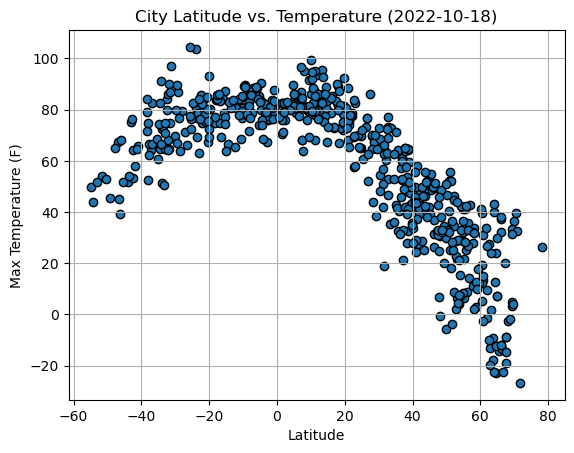

In [68]:
##TO DO MY CODE HERE # Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.iloc[:, 1],city_data_df.iloc[:, 3], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


##TO DO MY CODE HERE # Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig1.png")

##TO DO MY CODE HERE 
plt.grid(True)

# Show plot
plt.show()


#### Latitude Vs. Humidity

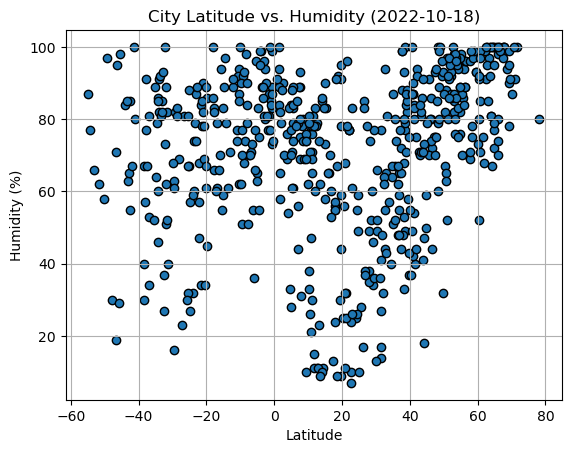

In [69]:
##TO DO MY CODE HERE # Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


##TO DO MY CODE HERE # Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

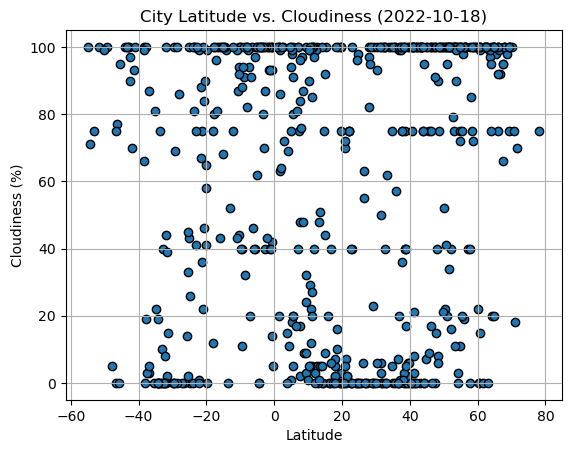

In [70]:
##TO DO MY CODE HERE # Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,5], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

##TO DO MY CODE HERE # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

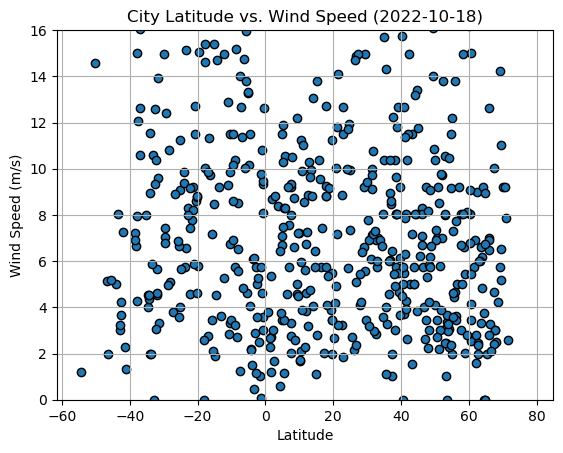

In [71]:
##TO DO MY CODE HERE # Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

##TO DO MY CODE HERE # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)
plt.ylim(0, 16)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
##TO DO MY CODE HERE # Define a function to create Linear Regression plots --use linregress (CHAGPT 2024, personal communication, January 26, 2024)
import numpy as np
import seaborn as sns

def linear_regression_plot(df, x_col, y_col, x_label, y_label, title):
    
    """
    Create a linear regression plot.

    Parameters:
    - df: Pandas DataFrame.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the x-axis.
    - x_label: str, label for the x-axis.
    - y_label: str, label for the y-axis.
    - title: str, title of the plot.
    """
      
    #linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x_col], df[y_col])
    
    #print slope, intercept, rvalue, standard error
    # print(f"Slope: {slope}")
    # print(f"Intercept: {intercept}")
    print(f"R-value: {rvalue}")
    # print(f"P-value: {pvalue}")
    # print(f"Standard Error: {stderr}")
    
    #scatter plot
    plt.scatter(df[x_col], df[y_col], label='Data Points')                                                   
                                                          
    #plot linear regression line
    regression_line = slope * df[x_col] + intercept
    plt.plot(df[x_col], regression_line, color='red', label='Linear Regression')
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.1), xycoords='axes fraction', color='red')
        
    #labels, scatter plot title, legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
        
    #print scatter plot
    plt.show()

#linear_regression_plot(city_data_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 'Linear Regression: Latitude vs. Temperature')

In [83]:
##TO DO MY CODE HERE # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,agadez,19.7500,10.2500,81.37,9.0,0.0,11.25,NE,1.710011e+09
3,bilibino,68.0546,166.4372,-2.52,99.0,100.0,2.51,RU,1.710011e+09
9,ilulissat,69.2167,-51.1000,3.22,78.0,75.0,5.75,GL,1.710011e+09
13,kyongsong,41.5878,129.6061,27.64,40.0,0.0,4.27,KP,1.710011e+09
14,college,64.8569,-147.8028,7.07,72.0,100.0,0.00,US,1.710011e+09


In [84]:
##TO DO MY CODE HERE # Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,76.86,67.0,43.0,9.08,PN,1.710011e+09
4,port-aux-francais,-49.3500,70.2167,45.52,97.0,100.0,31.16,TF,1.710011e+09
5,waitangi,-43.9535,-176.5597,51.82,84.0,100.0,5.01,NZ,1.710011e+09
6,sao joao da barra,-21.6403,-41.0511,84.29,84.0,67.0,16.58,BR,1.710011e+09
7,blackmans bay,-43.0167,147.3167,75.33,63.0,100.0,3.00,AU,1.710011e+09


###  Temperature vs. Latitude Linear Regression Plot

R-value: -0.8832039767521839


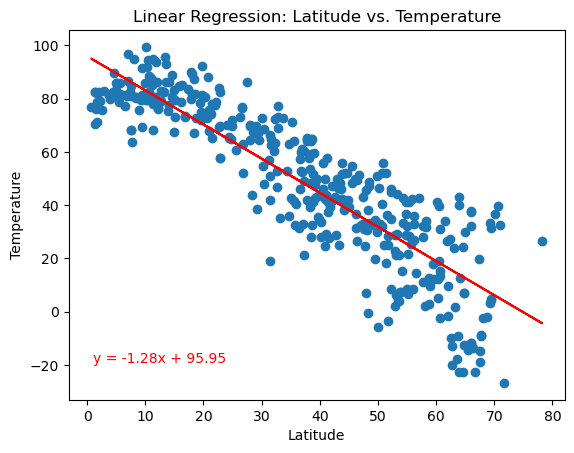

In [85]:
##TO DO MY CODE HERE # Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 
'Linear Regression: Latitude vs. Temperature')

R-value: 0.5963952288728213


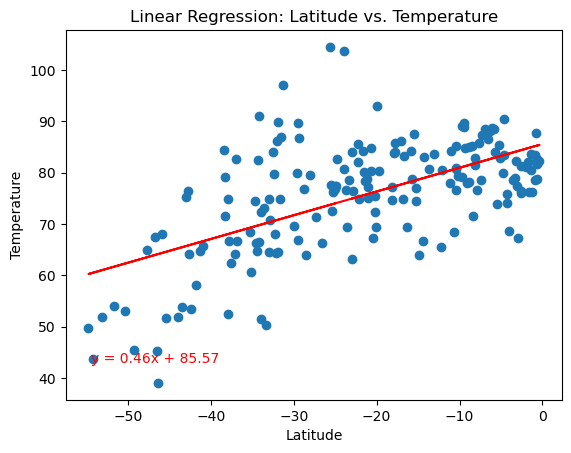

In [86]:
##TO DO MY CODE HERE # Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Max Temp', 'Latitude', "Temperature", 
'Linear Regression: Latitude vs. Temperature')

##NEED TO Describe any relationships AS PART OF ASSIGNMENT. NOT INCLUDED IN STARTER CODE 

**Discussion about the linear relationship:** 
There is a positive correlation between latitude and temperature. The R value being over 50% (0.57) suggests that is a positive correlation. As the latitidue increases so does temperature.

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.42428377944367185


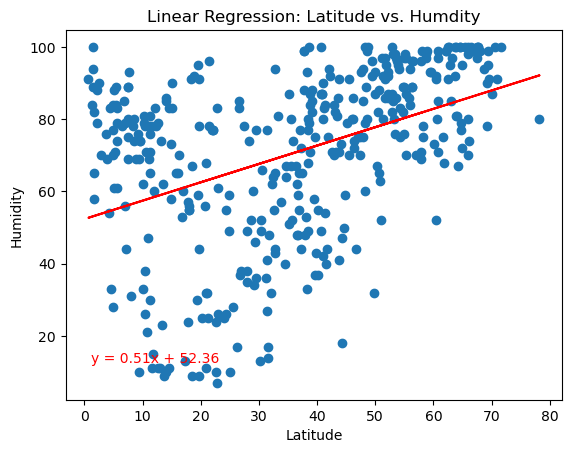

In [87]:
##TO DO MY CODE HERE #
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Humidity', 'Latitude', 'Humidity', 'Linear Regression: Latitude vs. Humdity')

R-value: 0.27148347707168696


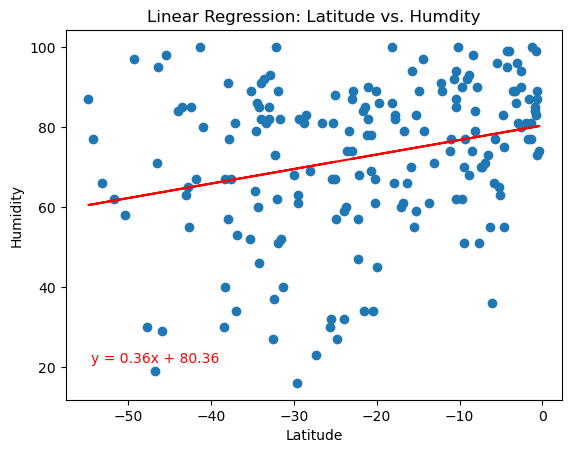

In [88]:
##TO DO MY CODE HERE #
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Humidity', 'Latitude', 'Humidity', 'Linear Regression: Latitude vs. Humdity')

##NEED TO Describe any relationships AS PART OF ASSIGNMENT. NOT INCLUDED IN STARTER CODE 

**Discussion about the linear relationship:** 

The slope is postive and therefore can suggest a positive correlation between latitude and humidity. In other words, an increase in latitude results in an increase in humidity. The R-value being low indicates that the correlation between Latitude and humidity is weak.

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 0.2682012874483911


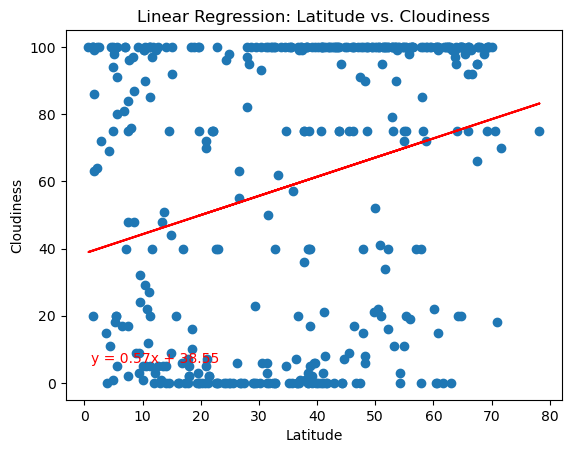

In [89]:
##TO DO MY CODE HERE #
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Linear Regression: Latitude vs. Cloudiness')

R-value: 0.22691832108812063


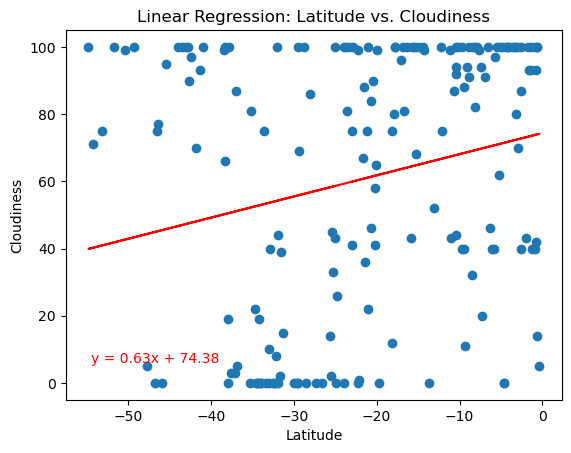

In [90]:
##TO DO MY CODE HERE #
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Cloudiness', 'Latitude', 'Cloudiness', 'Linear Regression: Latitude vs. Cloudiness')

##NEED TO Describe any relationships AS PART OF ASSIGNMENT. NOT INCLUDED IN STARTER CODE 

**Discussion about the linear relationship:** 

While the slope here indicates a positive correlation between Latitude and cloudiness, the R-value weakens that correlation. Only 12% of the change in cloudiness can be explained by a change in the Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

R-value: -0.14575929692894196


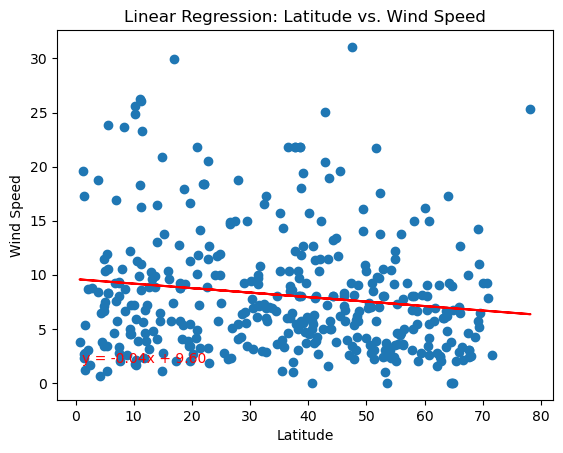

In [91]:
##TO DO MY CODE HERE #
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Linear Regression: Latitude vs. Wind Speed')

R-value: -0.23072662229079713


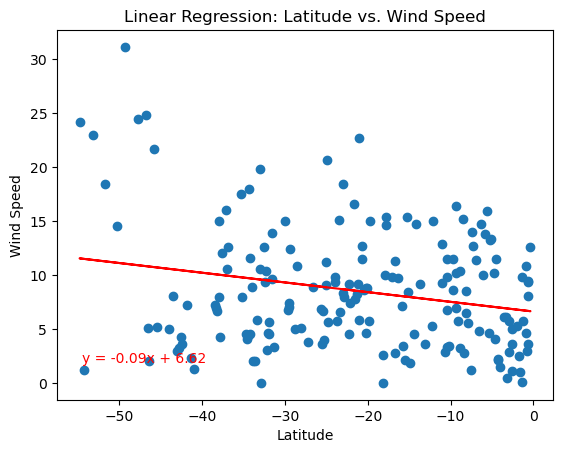

In [92]:
##TO DO MY CODE HERE #
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat', 'Wind Speed', 'Latitude', 'Wind Speed', 'Linear Regression: Latitude vs. Wind Speed')


##NEED TO Describe any relationships AS PART OF ASSIGNMENT. NOT INCLUDED IN STARTER CODE 

**Discussion about the linear relationship:** 

This suggests a negative correlation between wind and Latitude. The slope suggests that as latitude increases, wind speed decreases. The R-value as well indicates a negative correlation & at -0.38 it does not indicate a strong correlation between latitude and wind speed.